In [1]:
import numpy as np
from itertools import combinations

In [2]:
from collections import deque
from matplotlib import pyplot as plt
import Field
import Game
import Agent
import Cards
from utils import * 
from importlib import reload
from random import choice, shuffle

reload(Field)
reload(Game)
reload(Agent)
reload(Cards)

<module 'Cards' from '/home/clark/Apps/durakula/game/Cards.py'>

In [3]:
numplayers = 4
durak_game = Game.DurakGame(numplayers, 'small')

In [90]:
for p in durak_game.players:
    print(p.player_mode)

MODE_DEFEND
MODE_WAIT
MODE_ATTACK
MODE_ATTACK


In [91]:
print(durak_game.playing_field)

--- Playing Field ---
Drawing DurakDeck: --- Card Collection ---
Cards: S6,H5,C4,D7,S1,D6,S8,D8,H8,S7,S2.
Size: 11
-----------------------

0:--- Card Collection ---
Cards: D5,H0,H1.
Size: 3
-----------------------

1:--- Card Collection ---
Cards: D3,C0,C3,H2,S0.
Size: 5
-----------------------

2:--- Card Collection ---
Cards: D0,D2,C2,C7,H6,S3,S5.
Size: 7
-----------------------

3:--- Card Collection ---
Cards: C6,C8,H3,S4.
Size: 4
-----------------------

Trump suit is Spades
---------------------



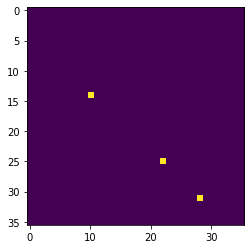

In [92]:
plt.imshow(durak_game.playing_field.field)

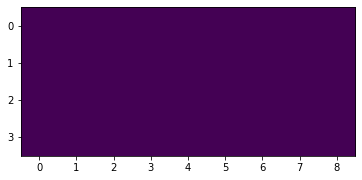

In [93]:
plt.imshow(durak_game.playing_field.attacks)

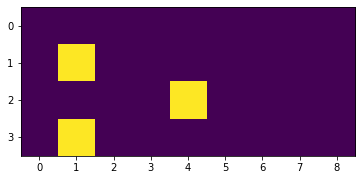

In [94]:
plt.imshow(durak_game.playing_field.attack_buffer)

In [95]:
players_on_attack = [p.player_id for p in durak_game.playing_field.attack_players()]
p_att_idx = players_on_attack[0]
print(durak_game.players[p_att_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D0,D2,C2,C7,H6,S3,S5.
Size: 7
-----------------------



In [96]:
p_def_idx = durak_game.playing_field.defend_player().player_id
print(durak_game.players[p_def_idx].get_deck_from_hand())

--- Card Collection ---
Cards: D5,H0,H1.
Size: 3
-----------------------



In [97]:
durak_game.playing_field.first_attack

False

In [98]:
attack_moves = durak_game.playing_field.get_legal_moves(p_att_idx)
attack_moves

[((0, 5),), ((1, 7),), ((0, 5), (1, 7)), ()]

In [99]:
random_move = choice(durak_game.playing_field.get_legal_moves(p_att_idx))
print(random_move)

((1, 7),)


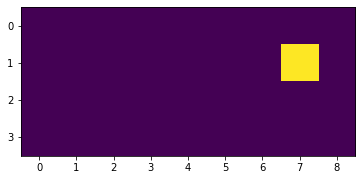

In [100]:
durak_game.get_next_state(random_move, p_att_idx)
plt.imshow(durak_game.playing_field.attacks)

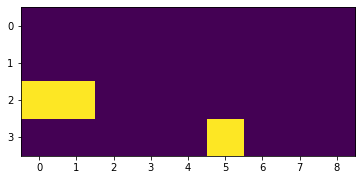

In [101]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [102]:
# player = durak_game.players[p_def_idx]
# attack_idxs = np.flatnonzero(durak_game.playing_field.attacks)
# n_vals = durak_game.playing_field.n_vals
# n_suits = durak_game.playing_field.n_suits
# nontrump_attack_idxs = attack_idxs[attack_idxs >= n_vals]
# valid_defenses = np.zeros_like(durak_game.playing_field.field)
# f = lambda x : (x // n_vals + 1)*n_vals

# for att_idx in attack_idxs:
#     valid_defenses[att_idx + 1 : f(att_idx), att_idx] = 1
# for att_idx in nontrump_attack_idxs:
#     valid_defenses[:n_vals, att_idx] = 1

# if durak_game.playing_field.first_attack:
#     valid_defenses[att_idx % n_vals : att_idx % n_vals + n_suits*n_vals : n_vals, att_idx] = 1

# valid_defenses *= player.hand.ravel()[:,np.newaxis]
# plt.imshow(valid_defenses)

In [103]:
defend_actions = durak_game.playing_field.get_legal_moves(p_def_idx)
print(defend_actions)

['ACTION_GIVEUP']


In [104]:
random_defend = choice(defend_actions)
print(random_defend)
# random_defend = 'ACTION_GIVEUP'

ACTION_GIVEUP


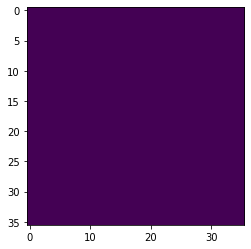

In [105]:
durak_game.get_next_state(random_defend, p_def_idx)
plt.imshow(durak_game.playing_field.field)

In [106]:
for p in durak_game.players:
    print(p.player_mode)

MODE_WAIT
MODE_ATTACK
MODE_DEFEND
MODE_WAIT


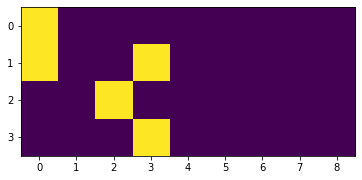

In [87]:
plt.imshow(durak_game.players[p_att_idx].hand)

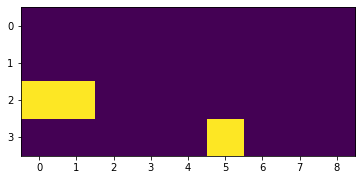

In [88]:
plt.imshow(durak_game.players[p_def_idx].hand)

In [89]:
durak_game.playing_field.field_active

True